In [2]:
! pip install scikit-learn

     |████████████████████████████████| 25.9 MB 128.4 MB/s            
     |████████████████████████████████| 306 kB 35.3 MB/s            


In [140]:
import numpy as np
import sklearn.datasets as dt
from tensorflow.keras.models import Model , Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

In [142]:
X, y = dt.make_circles(n_samples=1000, noise=0.1, random_state=1)

In [143]:
X.shape

(1000, 2)

In [144]:
y.shape

(1000,)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [146]:
y_train.shape

(670,)

In [147]:
np.unique(y_train , return_counts=True)

(array([0, 1]), array([340, 330]))

In [148]:
df1 = pd.DataFrame(X, columns = ['Column_A','Column_B'])
df2 = pd.DataFrame(y, columns = ['Label'])

In [149]:
df1.head()

,Column_A,Column_B
0,0.927877,-0.045217
1,-0.543032,-0.754447
2,0.924653,-0.714925
3,-0.102171,-0.892835
4,-1.017192,0.247378


In [150]:
df2.head()

,Label
0,1
1,1
2,0
3,0
4,0


In [151]:
df = pd.concat([df1,df2] , axis=1)

In [152]:
df.head()

,Column_A,Column_B,Label
0,0.927877,-0.045217,1
1,-0.543032,-0.754447,1
2,0.924653,-0.714925,0
3,-0.102171,-0.892835,0
4,-1.017192,0.247378,0


<AxesSubplot:xlabel='Column_A', ylabel='Column_B'>

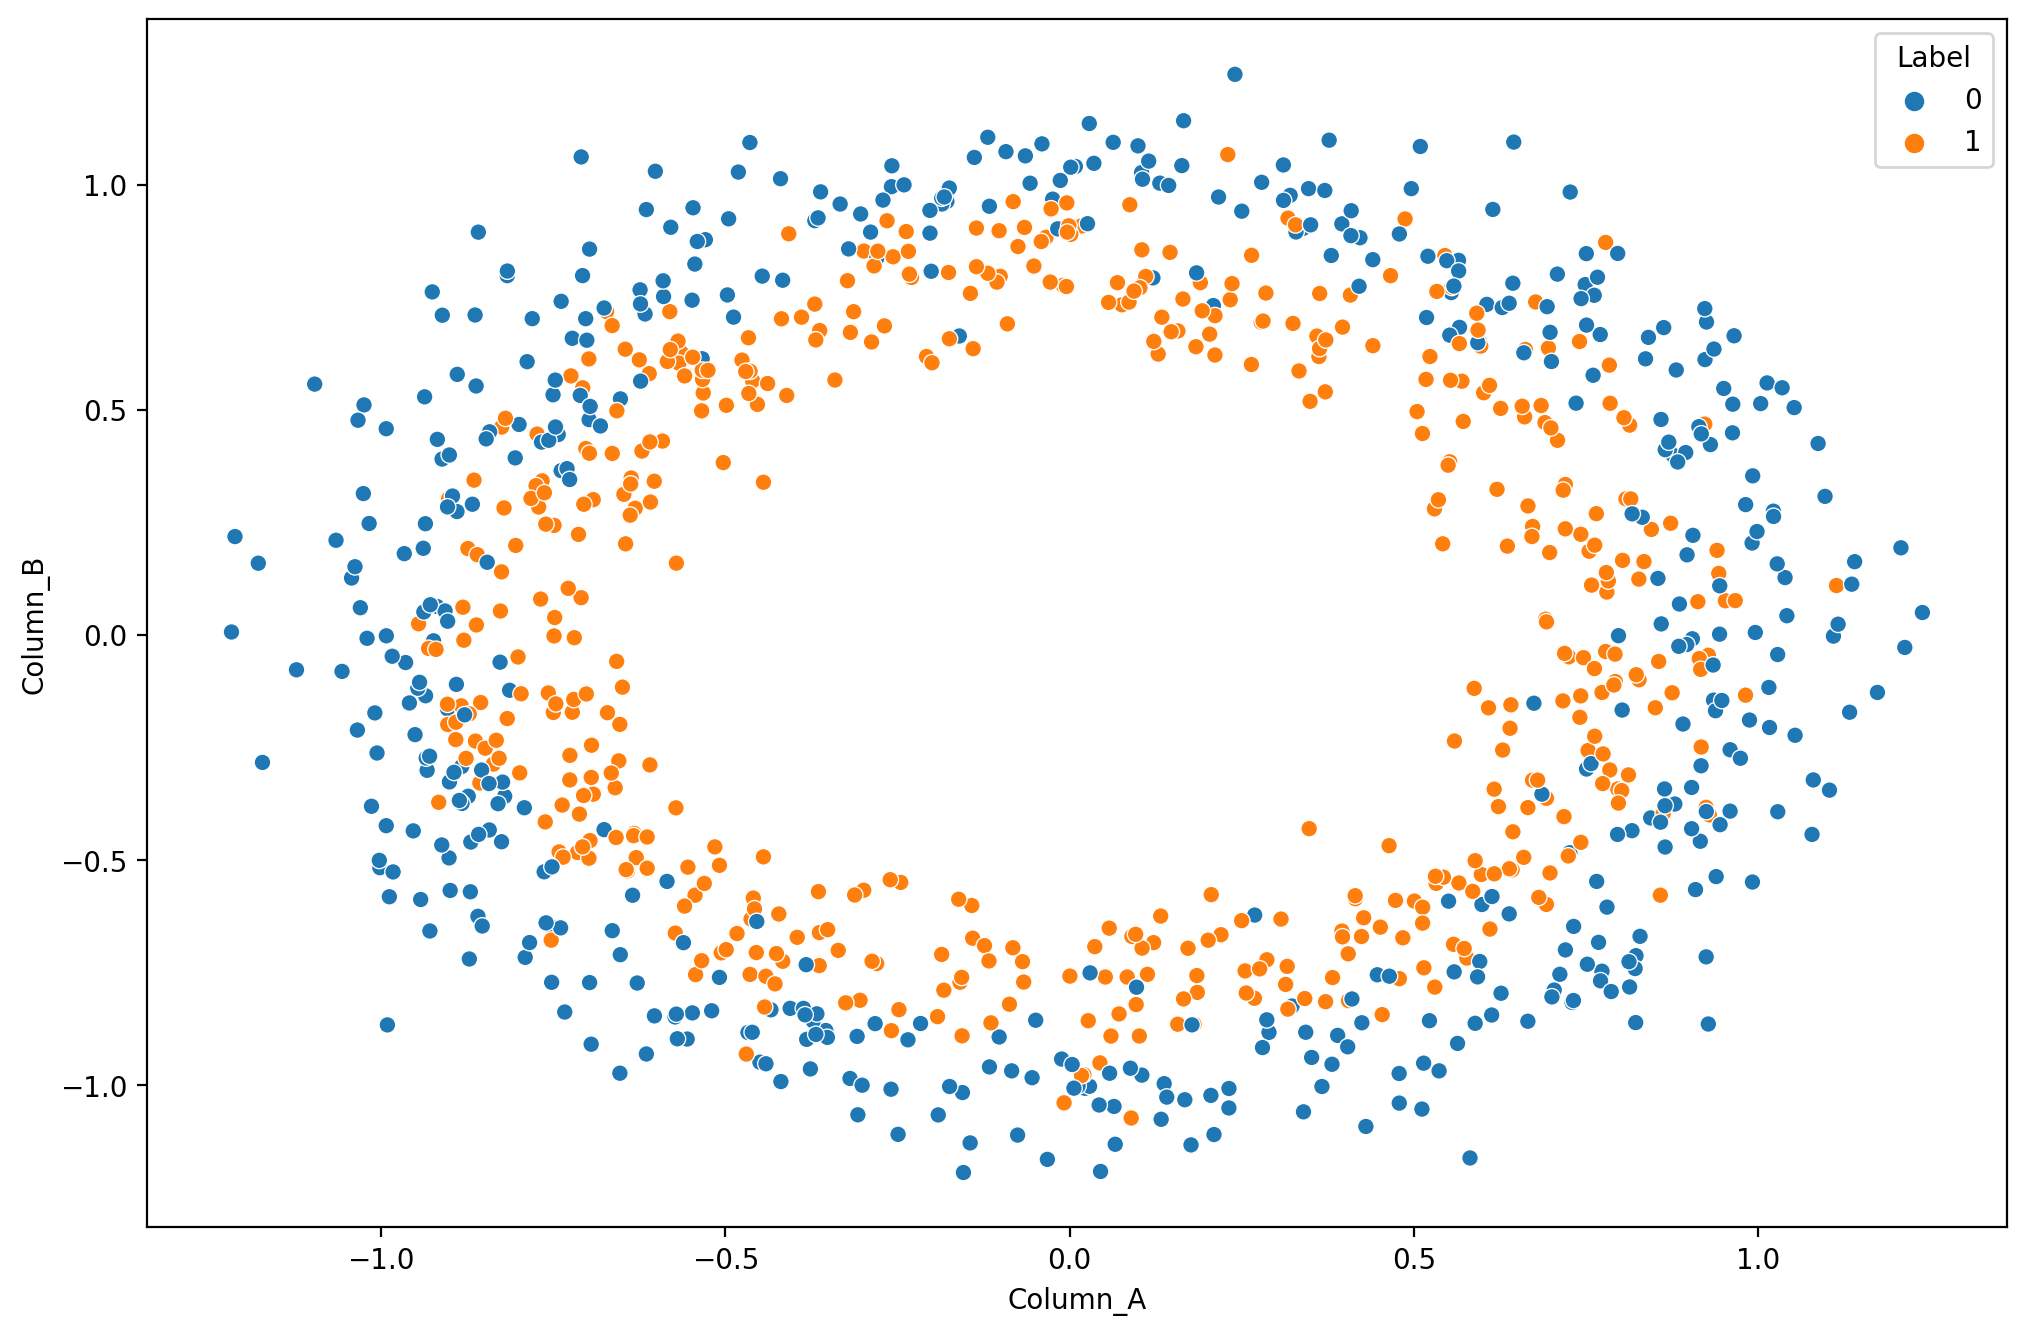

In [153]:
plt.figure(figsize=(12,8) , dpi=200)
sns.scatterplot(data=df , x = 'Column_A' , y = 'Column_B' , hue = 'Label')

In [154]:
import tensorflow as tf

In [172]:
tf.keras.backend.clear_session()

x = Input(shape=(X_train.shape[1]))

l = Dense(512 , activation = 'relu' , kernel_initializer='he_uniform' )(x)
l = Dense(1 , activation = 'sigmoid')(l)

model = Model(inputs=[x] , outputs=[l])
model.compile(optimizer= SGD(lr=0.01, momentum=0.9) , loss = 'binary_crossentropy' , metrics = ['accuracy'])

history = model.fit(X_train , y_train , validation_data = (X_test,y_test) , epochs = 50 )

Epoch 1/50
21/21 [==============================] - 0s 6ms/step - loss: 0.7211 - accuracy: 0.5090 - val_loss: 0.7234 - val_accuracy: 0.5333
Epoch 2/50
21/21 [==============================] - 0s 4ms/step - loss: 0.6968 - accuracy: 0.5015 - val_loss: 0.7017 - val_accuracy: 0.4939
Epoch 3/50
21/21 [==============================] - 0s 4ms/step - loss: 0.6973 - accuracy: 0.5403 - val_loss: 0.7104 - val_accuracy: 0.5273
Epoch 4/50
21/21 [==============================] - 0s 4ms/step - loss: 0.7551 - accuracy: 0.5179 - val_loss: 0.7596 - val_accuracy: 0.5242
Epoch 5/50
21/21 [==============================] - 0s 4ms/step - loss: 0.7363 - accuracy: 0.5433 - val_loss: 0.6939 - val_accuracy: 0.5364
Epoch 6/50
21/21 [==============================] - 0s 4ms/step - loss: 0.6968 - accuracy: 0.5567 - val_loss: 0.6690 - val_accuracy: 0.5515
Epoch 7/50
21/21 [==============================] - 0s 5ms/step - loss: 0.6880 - accuracy: 0.5433 - val_loss: 0.7018 - val_accuracy: 0.5515
Epoch 8/50
21/21 [==